In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



ModuleNotFoundError: No module named 'pandas'

# MLP


In [ ]:
#MLP


mseMLP = []
rmseMLP= []
maeMLP= []

p_MlpHiddenLayer = []
p_MlpActivation  = []
p_MlpMaxIter = []
p_MlpLearningRate  = []



print("MLP")
param_grid = {
    'hidden_layer_sizes': [(5,5,5), (5,10,15), (5,10,10), (5,10,15)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['adam'],
    'max_iter': [400,600,800,1000],
    'learning_rate_init': [0.001, 0.002, 0.003, 0.004,0.005,0.006,0.007,0.008,0.009,0.01]
}
melhor_validacao_mlp = 100000
best_paramsMLP = {}



for i in range(20):
    print(i+1)
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )
                    mlp.fit(x_treino, y_treino)
                    opiniao = mlp.predict(x_teste)
                    mse_validacao_mlp = mean_squared_error(y_teste, opiniao)
                    
                    if (mse_validacao_mlp < melhor_validacao_mlp):
                        melhor_validacao_mlp = mse_validacao_mlp
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }


    print(melhor_validacao_mlp)
    print(mse_validacao_mlp)
    print(best_paramsMLP)

    mlp = MLPRegressor(
                    hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                    activation=best_paramsMLP['activation'],
                    solver='adam',
                    max_iter=best_paramsMLP['max_iter'],
                    learning_rate_init=best_paramsMLP['learning_rate_init']
                )
    
    mlp.fit(x_treino, y_treino)
    opiniao_mlp = mlp.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_mlp).round(2)
    mse = mean_squared_error(y_teste, opiniao_mlp).round(2)
    rmse = np.sqrt(mse).round(2)

    maeMLP.append(mae)
    mseMLP.append(mse)
    rmseMLP.append(rmse)

    p_MlpHiddenLayer.append(best_paramsMLP['hidden_layer_sizes'])
    p_MlpActivation.append(best_paramsMLP['activation'])
    p_MlpMaxIter.append(best_paramsMLP['max_iter'])
    p_MlpLearningRate.append(best_paramsMLP['learning_rate_init'])

# RESULTADOS !!!!
maxp_MlpHiddenLayer = max(set(p_MlpHiddenLayer), key=p_MlpHiddenLayer.count)
maxp_MlpActivation = max(set(p_MlpActivation), key=p_MlpActivation.count)
maxp_MlpMaxIter = max(set(p_MlpMaxIter), key=p_MlpMaxIter.count)
maxp_MlpLearningRate = max(set(p_MlpLearningRate), key=p_MlpLearningRate.count)


media_maeMLP = np.mean(maeMLP)
media_mseMLP = np.mean(mseMLP)
media_rmseMLP = np.mean(rmseMLP)

p_MlpHiddenLayer.append(maxp_MlpHiddenLayer)
p_MlpActivation.append(p_MlpActivation)
p_MlpMaxIter.append(p_MlpMaxIter)
p_MlpLearningRate.append(p_MlpLearningRate)

maeMLP.append(media_maeMLP)
mseMLP.append(media_mseMLP)
rmseMLP.append(media_rmseMLP)

dfMLP = pd.DataFrame({
    'hidden_layer_sizes':p_MlpHiddenLayer,
    'activation':p_MlpActivation,
    'max_iter':p_MlpMaxIter,
    'learning_rate_init':p_MlpLearningRate,
    'MAE': maeMLP,
    'MSE': mseMLP,
    'RMSE': rmseMLP
})




MLP
1
359.1788662518255
460.64847983488625
{'hidden_layer_sizes': (400,), 'activation': 'tanh', 'max_iter': 600, 'learning_rate_init': 0.006}
2
349.9557743343227
420.8501184849635
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
3
349.9557743343227
423.69935494193965
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
4
349.9557743343227
396.60952083197355
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
5
349.9557743343227
460.4440516539667
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
6
349.9557743343227
556.5622876233122
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
7
349.9557743343227
434.8951237130167
{'hidden_layer_sizes': (200,), 'activation': 'tanh', 'max_iter': 1000, 'learning_rate_init': 0.006}
8
349.9557743343227
430.4891

In [ ]:
print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfMLP)
dfMLP.to_csv('resultadosModelos/dfMLP.csv', sep = ';', index = False, encoding='UTF-8')

DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


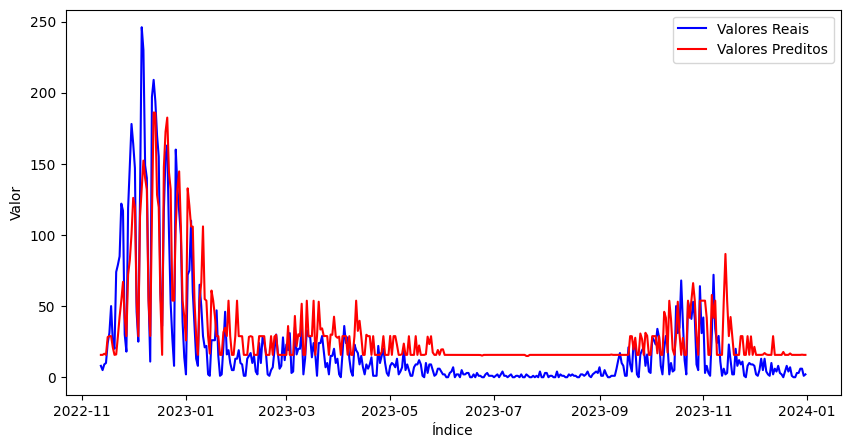

In [ ]:
len(opiniao_mlp)

print(x_teste.index)

serie_MLP = pd.Series(opiniao_mlp, index=x_teste.index)


plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue')
plt.plot(serie_MLP, label='Valores Preditos', color='red')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()